In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import product
import statsmodels.api as sm

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

plt.style.use('seaborn-darkgrid')

In [2]:
import torch.nn as nn

# Data source

In [3]:
#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go

#import date time
import datetime

In [4]:
# Set start date as 2014-01-01
start_date = datetime.datetime(2014, 9, 16)

# Set end date as today's date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

In [5]:
#coin -- change this to predict other coins
ticker = 'SOL-USD'

In [6]:
data = yf.download(tickers=ticker, start=start_date, end=end_date, interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
data.drop(columns=['Adj Close'], inplace=True)

In [8]:
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,16747614
2020-04-15,0.669289,0.704964,0.621531,0.646651,13075275
2020-04-16,0.630879,0.774192,0.625107,0.690816,21346031
2020-04-17,0.689312,0.719614,0.660728,0.660728,9870810
2020-04-18,0.660728,0.717618,0.659427,0.681096,9782112


In [9]:
data.shape

(1172, 5)

In [10]:
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-10,0.832005,1.313487,0.694187,0.951054,87364276
2020-04-11,0.951054,1.049073,0.765020,0.776819,43862444
2020-04-12,0.785448,0.956670,0.762426,0.882507,38736897
2020-04-13,0.890760,0.891603,0.773976,0.777832,18211285
2020-04-14,0.777832,0.796472,0.628169,0.661925,16747614
2020-04-15,0.669289,0.704964,0.621531,0.646651,13075275
2020-04-16,0.630879,0.774192,0.625107,0.690816,21346031
2020-04-17,0.689312,0.719614,0.660728,0.660728,9870810
2020-04-18,0.660728,0.717618,0.659427,0.681096,9782112


In [11]:
data.info()
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1172 entries, 2020-04-10 to 2023-06-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1172 non-null   float64
 1   High    1172 non-null   float64
 2   Low     1172 non-null   float64
 3   Close   1172 non-null   float64
 4   Volume  1172 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 54.9 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,1172.000000,1172.000000,1172.000000,1172.000000,1.172000e+03
mean,46.494985,48.665795,44.278507,46.485860,1.035876e+09
std,57.302876,59.756646,54.581299,57.240050,1.397770e+09
min,0.513391,0.559759,0.505194,0.515273,6.520200e+05
25%,4.220179,4.568905,3.886127,4.254177,7.136933e+07
50%,24.810493,25.987743,23.856928,24.806737,5.349015e+08
75%,45.654505,48.658025,43.027481,45.613109,1.487938e+09
max,258.781555,260.062103,246.122421,258.934326,1.706864e+10


In [13]:
print('Null Values:', data.isnull().values.sum())
print('If any NA values:', data.isnull().values.any())

Null Values: 0
If any NA values: False


In [14]:
data.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-06-16,14.760416,15.399172,14.469567,15.308254,232544705
2023-06-17,15.308581,16.065783,15.185427,15.650521,206436912
2023-06-18,15.649475,15.812691,15.361244,15.438235,141612316
2023-06-19,15.438766,16.075371,15.414377,16.073042,163949883
2023-06-20,16.078037,16.665106,15.759371,16.635231,265787114
2023-06-21,16.635487,17.379574,16.583469,17.257046,357788986
2023-06-22,17.257149,17.698505,16.610346,16.642620,299233520
2023-06-23,16.642969,17.510693,16.236748,17.149534,386994632
2023-06-24,17.149275,17.517597,16.463318,16.652863,260480952


<AxesSubplot:title={'center':'Bitcoin Weighted Price'}, xlabel='Date'>

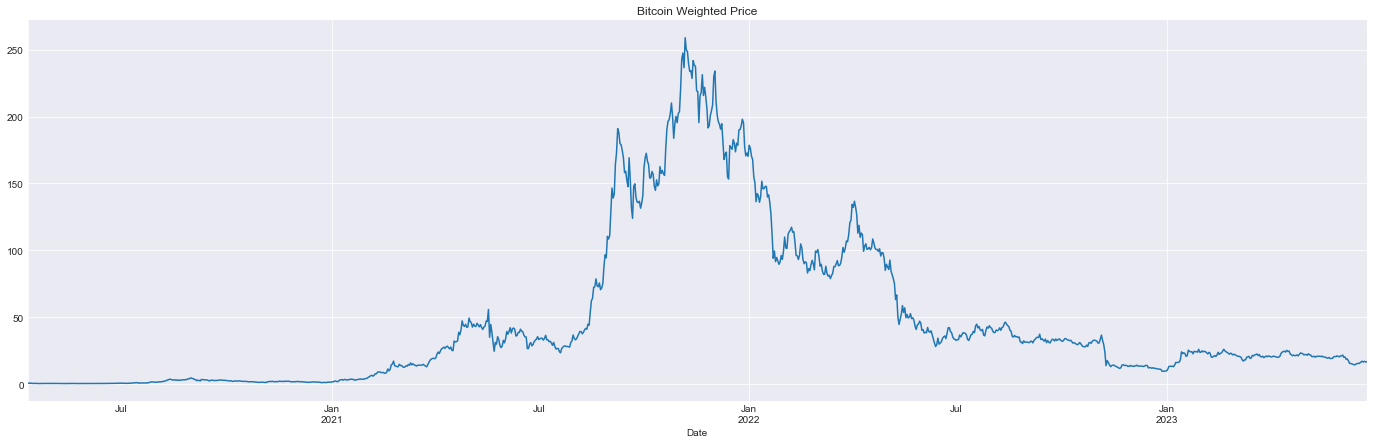

In [15]:
data.Close.plot(figsize=(24,7), title="Bitcoin Weighted Price")

# Lag plot
Lag plot are used to observe the autocorrelation. These are crucial when we try to correct the trend and stationarity and we have to use smoothing functions. Lag plot helps us to understand the data better.

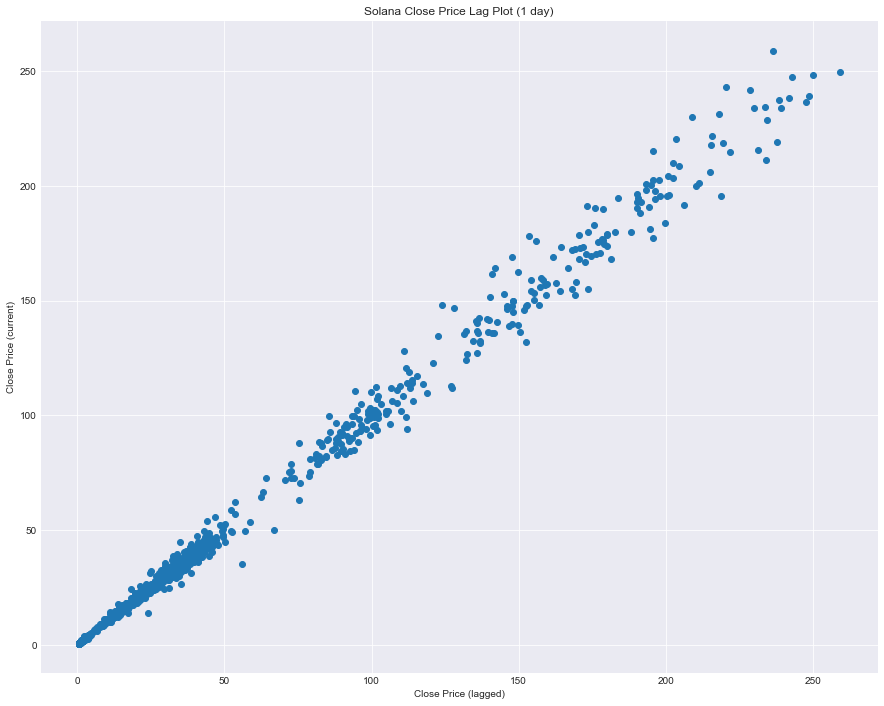

In [39]:
plt.figure(figsize=(15,12))

# Create a lag plot with a lag of 1 day
pd.plotting.lag_plot(data['Close'], lag=1)

# Set plot title and labels
plt.title('Solana Close Price Lag Plot (1 day)')
plt.xlabel('Close Price (lagged)')
plt.ylabel('Close Price (current)')

# Display the plot
plt.show()

In the lag plot of 1 day for Bitcoin's close price, a strong positive slope straight line is observed. This indicates the presence of a significant positive autocorrelation in the data. The positive autocorrelation suggests that the current day's close price is positively related to the previous day's close price. In other words, when the close price increases on a particular day, there is a higher likelihood of it increasing on the following day as well. This pattern implies the existence of short-term momentum or serial dependence in Bitcoin's close price. However, it is important to further validate this inference using statistical tests and consider additional analysis techniques before making any investment decisions.

# Define input and output

In [17]:
# Our input vector will consists of everything except our target, "Closing Price"
X, y = data.drop(columns=['Close']), data.Close.values
X.shape, y.shape

((1172, 4), (1172,))

In [18]:
X

,Open,High,Low,Volume
Date,,,,
2020-04-10,0.832005,1.313487,0.694187,87364276
2020-04-11,0.951054,1.049073,0.765020,43862444
2020-04-12,0.785448,0.956670,0.762426,38736897
2020-04-13,0.890760,0.891603,0.773976,18211285
2020-04-14,0.777832,0.796472,0.628169,16747614
...,...,...,...,...
2023-06-21,16.635487,17.379574,16.583469,357788986
2023-06-22,17.257149,17.698505,16.610346,299233520
2023-06-23,16.642969,17.510693,16.236748,386994632


In [19]:
y

array([ 0.95105398,  0.77681899,  0.88250703, ..., 17.14953423,
       16.65286255, 16.97138023])

# Preprocessing data

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_trans = ss.fit_transform(X)
y_trans = mm.fit_transform(y.reshape(-1, 1))
X_trans

array([[-0.79721084, -0.79275739, -0.798862  , -0.67887914],
       [-0.79513241, -0.79718413, -0.7975637 , -0.71001474],
       [-0.79802366, -0.79873111, -0.79761124, -0.71368325],
       ...,
       [-0.52117384, -0.52158889, -0.51398062, -0.46442447],
       [-0.51233446, -0.5214733 , -0.50982779, -0.5549742 ],
       [-0.52102539, -0.52443511, -0.5071917 , -0.56044372]])

Now comes the slightly fiddly part. We want to feed in 100 samples, up to the current day, and predict the next 50 time step values. To do this, we need a special function to ensure that the corresponding indices of X and y represent this structure. Examine this function carefully, but essentially it just boils down to getting 100 samples from X, then looking at the 50 next indices in y, and patching these together. Note that because of this we'll throw out the first 50 values of y.

In [21]:
# split a multivariate sequence past, future samples (X and y)
def split_sequences(input_sequences, output_sequence, n_steps_in, n_steps_out):
    X, y = list(), list() # instantiate X and y
    for i in range(len(input_sequences)):
        # find the end of the input, output sequence
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        # check if we are beyond the dataset
        if out_end_ix > len(input_sequences): break
        # gather input and output of the pattern
        seq_x, seq_y = input_sequences[i:end_ix], output_sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x), y.append(seq_y)
    return np.array(X), np.array(y)

X_ss, y_mm = split_sequences(X_trans, y_trans, 100, 50)
print(X_ss.shape, y_mm.shape)

(1024, 100, 4) (1024, 50)


In [41]:
len(X_ss)

1024

In [40]:
X_ss[0]

array([[-0.79721084, -0.79275739, -0.798862  , -0.67887914],
       [-0.79513241, -0.79718413, -0.7975637 , -0.71001474],
       [-0.79802366, -0.79873111, -0.79761124, -0.71368325],
       [-0.79618506, -0.79982044, -0.79739954, -0.72837407],
       [-0.79815662, -0.80141309, -0.80007206, -0.72942166],
       [-0.80005163, -0.80294509, -0.80019372, -0.73205007],
       [-0.80072221, -0.8017861 , -0.80012818, -0.72613043],
       [-0.79970206, -0.80269982, -0.79947528, -0.7343436 ],
       [-0.80020109, -0.80273324, -0.79949912, -0.73440708],
       [-0.79983816, -0.80328533, -0.8006161 , -0.73475954],
       [-0.80103526, -0.80404519, -0.8020441 , -0.73543738],
       [-0.80228462, -0.80462559, -0.80226458, -0.73445762],
       [-0.80159013, -0.80291161, -0.80114519, -0.72793238],
       [-0.79977128, -0.80306039, -0.80058247, -0.73175662],
       [-0.80084194, -0.80351337, -0.80033284, -0.73492092],
       [-0.80072834, -0.80351458, -0.80019343, -0.73617509],
       [-0.80033226, -0.

In [22]:
assert y_mm[0].all() == y_trans[99:149].squeeze(1).all()

In [23]:
y_mm[0]

array([0.00174643, 0.00156752, 0.00138463, 0.00178738, 0.00204634,
       0.00206862, 0.00185773, 0.00285176, 0.00406254, 0.00488882,
       0.00490983, 0.00442311, 0.00453347, 0.00395832, 0.00391355,
       0.00475018, 0.00498159, 0.00524871, 0.00479561, 0.00654393,
       0.00607784, 0.0075782 , 0.00831965, 0.0101251 , 0.01078924,
       0.0125938 , 0.01254048, 0.01119931, 0.01032634, 0.01110746,
       0.00999669, 0.01089201, 0.00922443, 0.01042104, 0.00939712,
       0.00969593, 0.01086281, 0.01095009, 0.01063999, 0.01177584,
       0.01133735, 0.01352888, 0.01336409, 0.01517129, 0.01651106,
       0.01481796, 0.01412125, 0.01165575, 0.01172716, 0.00805917])

In [24]:
total_samples = len(X)
train_test_cutoff = round(0.90 * total_samples)

X_train = X_ss[:-150]
X_test = X_ss[-150:]

y_train = y_mm[:-150]
y_test = y_mm[-150:] 

print("Training Shape:", X_train.shape, y_train.shape)
print("Testing Shape:", X_test.shape, y_test.shape) 

Training Shape: (874, 100, 4) (874, 50)
Testing Shape: (150, 100, 4) (150, 50)


In [25]:
import torch
from torch.autograd import Variable
# convert to pytorch tensors
X_train_tensors = Variable(torch.Tensor(X_train))
print(len(X_test))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

150


In [42]:
X_train_tensors.shape

torch.Size([874, 100, 4])

In [26]:
# reshaping to rows, timestamps, features
X_train_tensors_final = torch.reshape(X_train_tensors,   
                                      (X_train_tensors.shape[0], 100, 
                                       X_train_tensors.shape[2]))
X_test_tensors_final = torch.reshape(X_test_tensors,  
                                     (X_test_tensors.shape[0], 100, 
                                      X_test_tensors.shape[2])) 

print("Training Shape:", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape:", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape: torch.Size([874, 100, 4]) torch.Size([874, 50])
Testing Shape: torch.Size([150, 100, 4]) torch.Size([150, 50])


In [27]:
X_check, y_check = split_sequences(X, y.reshape(-1, 1), 100, 50)
X_check[-1][0:4]

array([[2.44106026e+01, 2.50173855e+01, 2.38418274e+01, 4.89857934e+08],
       [2.39807873e+01, 2.66528053e+01, 2.38278446e+01, 1.13162163e+09],
       [2.61353016e+01, 2.62493153e+01, 2.34891758e+01, 1.08417033e+09],
       [2.39493217e+01, 2.43412876e+01, 2.35922489e+01, 6.17019880e+08]])

In [28]:
y_check[-1]

array([21.84422874, 20.65746307, 20.68364525, 20.95371056, 20.23488045,
       20.91179466, 20.86876106, 20.95339775, 21.0071888 , 20.67942047,
       21.06839943, 20.34869576, 20.34987068, 20.28544617, 19.60943794,
       19.54204559, 20.04318237, 19.22366333, 19.26066208, 19.36695671,
       20.42523384, 20.79857826, 20.5865097 , 21.25408363, 20.82450294,
       20.50221825, 21.25759506, 21.15556526, 21.81897545, 20.07505989,
       20.39848328, 18.63428307, 18.90947533, 17.37969971, 15.65610123,
       15.5587759 , 15.19670773, 15.01819324, 14.48657227, 14.75947285,
       15.30825424, 15.65052128, 15.43823528, 16.07304192, 16.63523102,
       17.25704575, 16.64262009, 17.14953423, 16.65286255, 16.97138023])

In [29]:
data.Close.values[-50:]

array([21.84422874, 20.65746307, 20.68364525, 20.95371056, 20.23488045,
       20.91179466, 20.86876106, 20.95339775, 21.0071888 , 20.67942047,
       21.06839943, 20.34869576, 20.34987068, 20.28544617, 19.60943794,
       19.54204559, 20.04318237, 19.22366333, 19.26066208, 19.36695671,
       20.42523384, 20.79857826, 20.5865097 , 21.25408363, 20.82450294,
       20.50221825, 21.25759506, 21.15556526, 21.81897545, 20.07505989,
       20.39848328, 18.63428307, 18.90947533, 17.37969971, 15.65610123,
       15.5587759 , 15.19670773, 15.01819324, 14.48657227, 14.75947285,
       15.30825424, 15.65052128, 15.43823528, 16.07304192, 16.63523102,
       17.25704575, 16.64262009, 17.14953423, 16.65286255, 16.97138023])

# Build the model

In [30]:
class LSTM(nn.Module):
    
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super().__init__()
        self.num_classes = num_classes # output size
        self.num_layers = num_layers # number of recurrent layers in the lstm
        self.input_size = input_size # input size
        self.hidden_size = hidden_size # neurons in each lstm layer
        # LSTM model
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.2) # lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) # fully connected 
        self.fc_2 = nn.Linear(128, num_classes) # fully connected last layer
        self.relu = nn.ReLU()
        
    def forward(self,x):
        # hidden state
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # cell state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        # propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # (input, hidden, and internal state)
        hn = hn.view(-1, self.hidden_size) # reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) # first dense
        out = self.relu(out) # relu
        out = self.fc_2(out) # final output
        return out

In [31]:
def training_loop(n_epochs, lstm, optimiser, loss_fn, X_train, y_train,
                  X_test, y_test):
    for epoch in range(n_epochs):
        lstm.train()
        outputs = lstm.forward(X_train) # forward pass
        optimiser.zero_grad() # calculate the gradient, manually setting to 0
        # obtain the loss function
        loss = loss_fn(outputs, y_train)
        loss.backward() # calculates the loss of the loss function
        optimiser.step() # improve from loss, i.e backprop
        # test loss
        lstm.eval()
        test_preds = lstm(X_test)
        test_loss = loss_fn(test_preds, y_test)
        if epoch % 100 == 0:
            print("Epoch: %d, train loss: %1.5f, test loss: %1.5f" % (epoch, 
                                                                      loss.item(), 
                                                                      test_loss.item())) 
            

In [32]:
n_epochs = 1000 # 1000 epochs
learning_rate = 0.001 # 0.001 lr

input_size = 4 # number of features
hidden_size = 2 # number of features in hidden state
num_layers = 1 # number of stacked lstm layers

num_classes = 50 # number of output classes 

lstm = LSTM(num_classes, 
              input_size, 
              hidden_size, 
              num_layers)

In [33]:
loss_fn = torch.nn.MSELoss()    # mean-squared error for regression
optimiser = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

In [34]:
training_loop(n_epochs=n_epochs,
              lstm=lstm,
              optimiser=optimiser,
              loss_fn=loss_fn,
              X_train=X_train_tensors_final,
              y_train=y_train_tensors,
              X_test=X_test_tensors_final,
              y_test=y_test_tensors)

Epoch: 0, train loss: 0.14905, test loss: 0.03437
Epoch: 100, train loss: 0.01458, test loss: 0.00118
Epoch: 200, train loss: 0.01009, test loss: 0.00107
Epoch: 300, train loss: 0.00951, test loss: 0.00078
Epoch: 400, train loss: 0.00910, test loss: 0.00050
Epoch: 500, train loss: 0.00859, test loss: 0.00043
Epoch: 600, train loss: 0.00899, test loss: 0.00039
Epoch: 700, train loss: 0.00827, test loss: 0.00039
Epoch: 800, train loss: 0.00743, test loss: 0.00031
Epoch: 900, train loss: 0.00667, test loss: 0.00028


# Prediction on train set

1172
1172
1024
1024


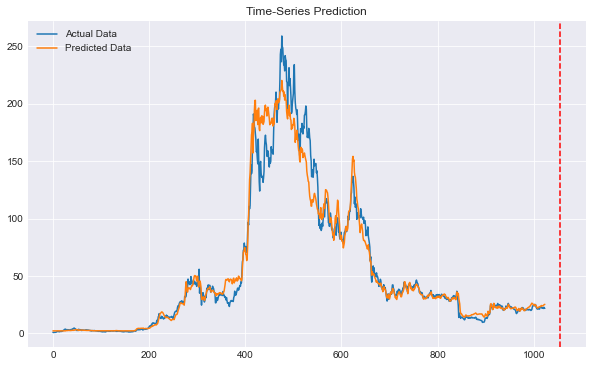

In [35]:
df_X_ss = ss.transform(data.drop(columns=['Close'])) # old transformers
print(len(df_X_ss))
df_y_mm = mm.transform(data.Close.values.reshape(-1, 1)) # old transformers
print(len(df_y_mm))
# split the sequence

past_days = 100
next_pred_days = 50
df_X_ss, df_y_mm = split_sequences(df_X_ss, df_y_mm, past_days, next_pred_days)


# converting to tensors
df_X_ss = Variable(torch.Tensor(df_X_ss))
df_y_mm = Variable(torch.Tensor(df_y_mm))
# reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 100, df_X_ss.shape[2]))
print(len(df_X_ss))

train_predict = lstm(df_X_ss) # forward pass
data_predict = train_predict.data.numpy() # numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) # reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
true, preds = [], []
for i in range(len(dataY_plot)):
    true.append(dataY_plot[i][0])
for i in range(len(data_predict)):
    preds.append(data_predict[i][0])
plt.figure(figsize=(10,6)) #plotting
print(len(preds))
plt.axvline(x=train_test_cutoff, c='r', linestyle='--') # size of the training set

plt.plot(true, label='Actual Data') # actual plot
plt.plot(preds, label='Predicted Data') # predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

# Prediction on test set

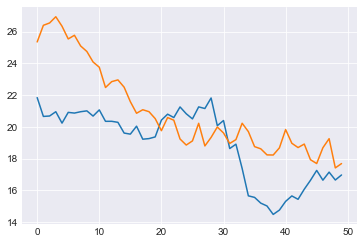

In [36]:
test_predict = lstm(X_test_tensors_final[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

test_target = y_test_tensors[-1].detach().numpy() # last sample again
test_target = mm.inverse_transform(test_target.reshape(1, -1))
test_target = test_target[0].tolist()

plt.plot(test_target, label="Actual Data")
plt.plot(test_predict, label="LSTM Predictions")
plt.show()

[ 0.95105398  0.77681899  0.88250703 ... 17.14953423 16.65286255
 16.97138023]


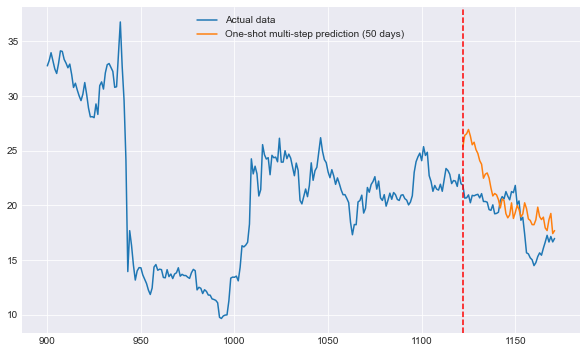

In [37]:
plt.figure(figsize=(10,6)) #plotting
print(y)
a = [x for x in range(900, len(y))]
plt.plot(a, y[900:], label='Actual data');
c = [x for x in range(len(y)-50, len(y))]
plt.plot(c, test_predict, label='One-shot multi-step prediction (50 days)')
plt.axvline(x=len(y)-50, c='r', linestyle='--')
plt.legend()
plt.show()

In [38]:
#RMSE
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test_target,test_predict))

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
mapescore = mean_absolute_percentage_error(test_target,test_predict)

#Print
print("RMSE score: ", rms)
print("MAPE score: ", mapescore)

RMSE score:  3.0279378077695585
MAPE score:  0.13814994217472717
